# Forzado armónico de un sistema de un único grado de libertad

[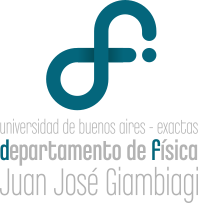](https://www.df.uba.ar/)

[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

---

## Sistema forzado
![](figuras/shabana_fig_1_11.png)  
La dinámica del sistema de la figura estará determinada por  
- m : masa
- k : rigidez (_stiffness_) de un resorte que proveé una fuerza elástica según el modelo de Hooke, $\vec{F}_\mathrm{elástica} = - k x \hat{x}$
- c : coeficiente de la fuerza de amortiguación modelizada lineal con la velocidad, provista por un amortiguador en cuyo interior un pistón está sumergido en un fluido viscoso como el aceite, $\vec{F}_\mathrm{amortiguación} = - c \dot{x} \hat{x}$
- F(t) : un fuerza externa arbitaria en el tiempo que eventualmente lo saque del equilibrio. 

In [1]:
# biblioteca de cálculo simbólico
import sympy as sym
import sympy.physics.mechanics as mech
mech.init_vprinting() # notación con puntos para derivadas temporales

In [2]:
t = sym.symbols('t') # tiempo
m, k, c = sym.symbols('m, k, c', positive = True)
x, F = mech.dynamicsymbols('x F')

Para una amortiguación proporcional con la velocidad la dinámica la describe

In [3]:
x_Dinámica = sym.Eq(m* x.diff(t,2) + c* x.diff(t) + k* x , F)
x_Dinámica

que en ingeniería suele escibirse normalizando por la masa

In [4]:
x_Dinámica_masa = sym.Eq( (x_Dinámica.lhs/ m).expand(), x_Dinámica.rhs/ m)
x_Dinámica_masa

In [5]:
omega, Gamma = sym.symbols('omega, Gamma', real=True)
x_Dinámica_omegaGamma = x_Dinámica_masa.subs([(k/m, omega**2), (c/m, Gamma) ]).simplify()
x_Dinámica_omegaGamma

## Forzado armónico
Vimos que cuando $F = 0$ el movimiento se extingue más o menos rápido en función del $c$ de amortiguación, pero finalmente lo hace.
En presencia de $F(t)$ igualmente la contribución de la solución de la ecuación homogénea se vá extinguiendo durante un inicial **transitorio**.
Pasado este domina la dinámica una solución particular en función de $F(t)$ que impone un **estado estacionario** de oscilación.

Se estudiará primero la respuesta el sistema con una fuerza armónica

In [6]:
F_0, omega_f = sym.symbols('F_0 omega_f', positive = True)
F_armónica = sym.Eq(F, F_0* sym.sin(omega_f* t))
F_armónica

La ecuación diferencial a resolver es 

In [7]:
x_forzadoArmónico = x_Dinámica_omegaGamma.expand().subs(F, F_armónica.rhs)
x_forzadoArmónico

Sabemos que substituyendo la solución particular que responde a tal forzado $x_p = A_1 \cos{\omega_f t} + A_2 \sin{\omega_f t}$ en la ecuación permite obtener los $A_i$.
Pero la función `dsolve` de `sympy` puede encargarse de todo el proceso y darnos $x = x_h + x_p$ directamente. 

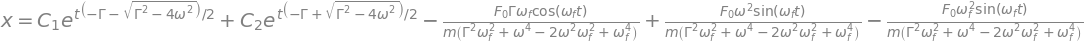

In [8]:
x_forzadoArmónico_sol = sym.dsolve(x_forzadoArmónico)
x_forzadoArmónico_sol

Los términos que dependen de $C_i$ son los de la solución homogénea que es significativa durante un **transitorio** que se considera extinto para $t> 10 \tau= 20 \Gamma^{-1}$ (10 **períodos de relajación**).
Para tiempos posteriores la solución alcanza el **estado estacionario** dado por los términos que dependen del forzado.

Se establece $C_1 = C_2 = 0$ para obtener solo $x_p(t)$.

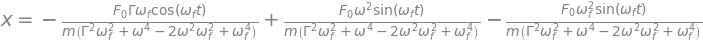

In [9]:
x_particular = x_forzadoArmónico_sol.subs([('C1', 0), ('C2', 0)])
x_particular

### Amplitud de oscilación en el estado estacionario

Si se simplifica la solución particular

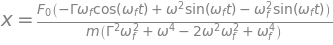

In [10]:
x_particular = x_particular.simplify()
x_particular

se vé que será el denominador común el que determine la amplitud del movimiento, pues los términos del numerador aparecen acotados por funciones armónicas.

Para ver donde se maximiza la amplitud del movimiento en función de $\omega_f$ sería interesante aislar este denominador y generar un gráfico de algo proporcional a la fracción $\frac{1}{\text{denominador}}$. Es útil para esto que `Sympy` tenga la función `args` que "desmenuza" en sus partes cualquier expresión:

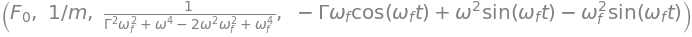

In [11]:
x_particular.rhs.args

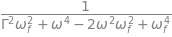

In [12]:
x_particular.rhs.args[2]

Para graficar tal función vs. $\omega_f$ se requieren las magnitudes de los parámetros del sistema.
Utilizaremos uno que sin $F(t)$ era **sub-amortiguado**, con un $\Gamma$ de un décimo del crítico, $\Gamma = \frac{1}{10} 2 \omega = \frac{1}{5} \omega$.

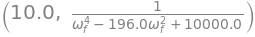

In [103]:
k_magnitud = 100 # [N m-1]
m_magnitud = 1 # [kg]
fracciónCrítico = 10 # 1/10 del Gamma crítico
Gamma_magnitud = (1/fracciónCrítico) * (2* omega) # [s-1]

parámetros ={
    omega : sym.sqrt(k_magnitud/m_magnitud),
    m : m_magnitud,
    Gamma : Gamma_magnitud,
}

función_parámetros = x_particular.rhs.args[2].subs(parámetros)
parámetros[omega], función_parámetros

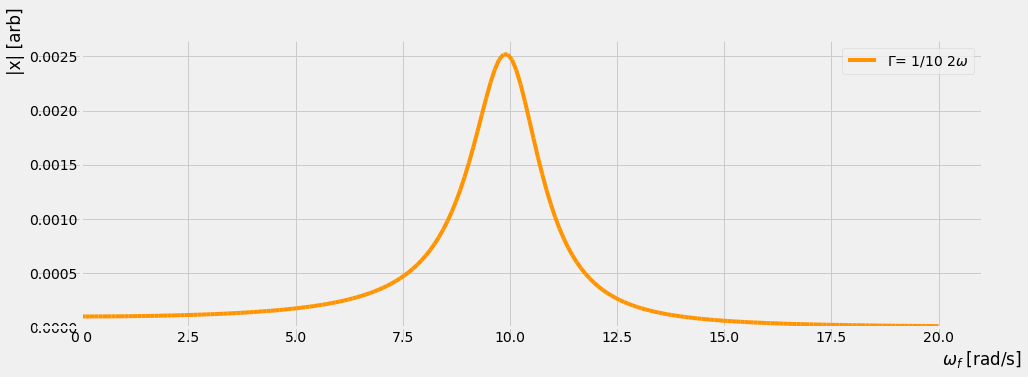

In [107]:
import matplotlib as mpl
mpl.style.use('fivethirtyeight') # estilo de gráficos con grilla y letras grandes

gráfico_Gamma_decimo = sym.plot(función_parámetros, (omega_f,0, 20),
                                ylabel='|x| [arb]', xlabel=r'$\omega_f$ [rad/s]',
                                adaptive = False, nb_of_points = 200, size = (14.0,5.0),
                                line_color = mpl.cm.hsv(1.0/fracciónCrítico),
                                label = f'$\Gamma$= 1/{fracciónCrítico} $2 \omega$', legend = True,
                                show = False) # Gamma 1/10 crítico
gráfico_Gamma_decimo.show()

Parece que la amplitud de oscilación en el estado estacionario tiene un máximo cuando la frecuencia del forzado armónico $\omega_f$ es próxima a la frecuencia de oscilación natural del sistema $\omega$. Esto se llama **resonancia** y es algo que se busca evitar si se requiere una relativa estabilidad del sistema.

## Resonancia y amortiguamiento

¿No hace nada el amortiguamiento? ¿La resonancia se produce con un $\omega_f = \omega$, la frecuencia natural de oscilación?

En la oscilación sub-amortiguada sin forzamiento  la frecuencia de oscilación no era $\omega$, sino una modificada por la $\Gamma < 2 \omega$
$$
  \omega' = \frac{1}{2} \left| \sqrt{\Gamma^2 - 4 \omega^2} \right|.
$$
Pero en la solución particular

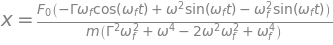

In [78]:
x_particular

el argumento de las funciones armónicas es la frecuencia del forzamiento $\omega_f$.
Evidentemente en el **estado estacionario** la frecuencia de oscilación no es afectada por $\Gamma$.

Pero aún así, ¿no debiera $\Gamma$ afectar de alguna manera la oscilación del sistema forzado?
Tal vez algo suceda si hacemos al sistema _"más díficil de agitar"_ haciendo que $\Gamma$ sea próximo a su valor crítico.
Se puede ensayar esto haciendo gráficos.

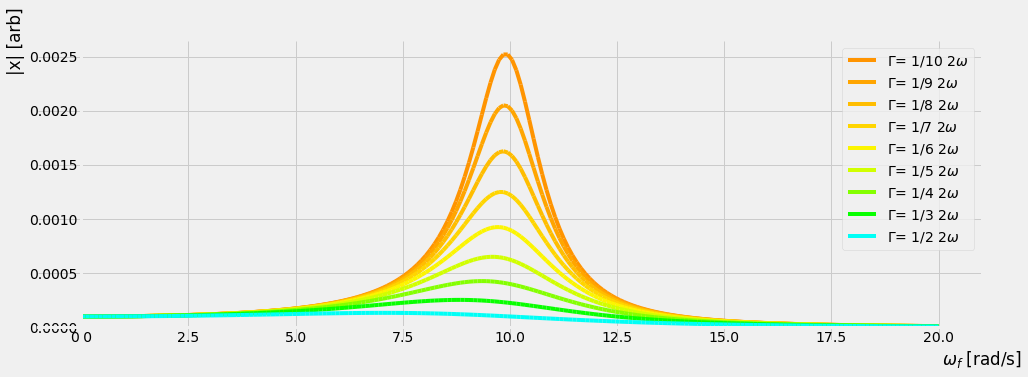

In [108]:
for fracciónCrítico in range(9,1,-1): # 9,8,...,3,2
    Gamma_magnitud = (1/fracciónCrítico) * (2* omega) # [s-1]
    parámetros ={
        omega : sym.sqrt(k_magnitud/m_magnitud),
        m : m_magnitud,
        Gamma : Gamma_magnitud, # actualiza Gamma con nueva fracción
    }
    función_parámetros = x_particular.rhs.args[2].subs(parámetros) # recalcula función con nuevos parámetros
    p_1_0 = sym.plot(función_parámetros, (omega_f,0, 20),
                     adaptive = False, nb_of_points = 200, size = (14.0,5.0),
                     line_color = mpl.cm.hsv(1.0/ fracciónCrítico),
                     label = f'$\Gamma$= 1/{fracciónCrítico} $2 \omega$', legend = True,
                     show = False)
    gráfico_Gamma_decimo.append(p_1_0[0]) # lo agrega al gráfico anterior
    
gráfico_Gamma_decimo.show()

Se aprecian dos cosas a medida que $\Gamma$ se aproxima a $\Gamma_\text{crítico} = 2 \omega$:
- una marcada reducción de la amplitud de la oscilación para $\omega_f$ próximos al de resonancia,
- un sutíl corrimiento de la resonancia hacia frecuencias menores alejándose de $\omega$.

Entonces cuando se amortigua un sistema se busca un que $\Gamma$:
- se aproxime al crítico para que ante la resonancia con un forzado la amplitud no sea grande,
- pero que de cesar el forzado un pequeño cambio de parámetros no lo lleve al régimen sobre-amortiguado y se produzcan violentos rebotes.

## La energía en el sistema forzado

Pero, ¿porqué sucede la resonancia?
Para responder esto hay que estudiar la **transferencia de energía** entre el sistema y su forzamiento.

La $F(t)$ hace trabajo sobre el sistema, así que esta es su fuente de energía.
Pero, ¿se "acumula" tal energía?
La evidencia de que no es que la trayectoria $x_p(t)$ es períodica en $T_f = \frac{2 \pi}{\omega_f}$.
En cada $T_f$ alcanza los mismos apartamientos del equilibrio, es decir las mismas energías elásticas del resorte.
Lo mismo con las velocidades y por tanto energías cinéticas de $m$.
Entre un $T_f$ y el siguiente no se produce una "acumulación de energía".

Si **no hay ganancia de energía** con cada $T_f$, ¿cómo la **pierde** en ese mismo $T_f$?
Hay que recordar el mecánismo de **amortiguamiento**.
El aceite dentro del amortiguador presenta una fuerza de resistencia a la velocidad de su pistón.
Esta fuerza parte del rozamiento de las moléculas de aceite.
Como en todo rozamiento hay perdida de energía que se disipa por calor.
En el sistema estudiado tal pérdida es la responsable de compensar la ganancia en $T_f$.

Puesto que la amplitud es mayor en la resonancia, la energía potencial que alcanza el sistema es mayor.
A falta de otra fuente, necesariamente la energía que le confiere el trabajo de $F(t)$ en $T_f$ debe ser mayor cuanto más próxima sea $\omega_f$ a la de resonancia. 

La variación de energía del sistema fruto del trabajo $\mathrm{d}W = \vec{F}(t) \cdot \mathrm{d} \vec{x}_p(t)$ en cada $T_f$ es
$$
    \Delta E = \int_0^{T_f} \mathrm{d}W 
    = \int_0^{T_f} \vec{F}(t) \cdot \frac{\partial}{\partial t} \vec{x}_p(t) \mathrm{d}t
    = \int_0^{T_f} \vec{F}(t) \cdot \dot{\vec{x}}_p(t) \mathrm{d}t
    = \int_0^{T_f} F(t) \dot{x}_p(t) \mathrm{d}t ,
$$
ya que $\vec{F}(t)$ y $\dot{\vec{x}}_p(t)$ son colineales

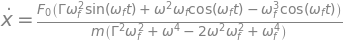

In [26]:
x_p_punto = sym.Eq(x.diff(t), x_particular.rhs.diff(t) )
x_p_punto

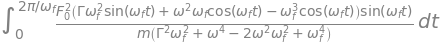

In [42]:
deltaE_forzado_integral = sym.Integral(F_armónica.rhs* x_p_punto.rhs, (t, 0, 2* sym.pi/ omega_f) )
deltaE_forzado_integral

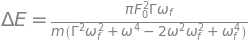

In [47]:
deltaE_forzado = sym.Eq(sym.Symbol('\Delta E'), deltaE_forzado_integral.doit() )
deltaE_forzado

Esta expresión comparte el mismo denominador que la solución particular

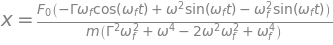

In [28]:
x_particular

que se mostró presenta un máximo de amplitud para la frecuencia de resonancia.
En síntesis: la mayor ganancia de energía explica la mayor amplitud de $x_p$ en $\omega_f$ próximos a la frecuencia de resonancia. 